## Name: Nikhil Vikas kale
## Roll No.: 039
## Subject: LP-IV(DL)
## Experiment No.: 03

In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [19]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [20]:
train_dir = r'C:\Users\nkale\Downloads\cats_and_dogs\train'
validation_dir = r'C:\Users\nkale\Downloads\cats_and_dogs\validation'
test_dir =r'C:\Users\nkale\Downloads\cats_and_dogs\test'

### Data Preprocessing

In [21]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
#Model Bulding
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
#Model Fit And Train
history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=25)

C:\Users\nkale\AppData\Local\Temp\ipykernel_13088\2815479969.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
25/25 [==============================] - 39s 2s/step - loss: 0.7007 - acc: 0.5188 - val_loss: 0.6894 - val_acc: 0.5075
Epoch 2/5
25/25 [==============================] - 31s 1s/step - loss: 0.6908 - acc: 0.4988 - val_loss: 0.6881 - val_acc: 0.5437
Epoch 3/5
25/25 [==============================] - 29s 1s/step - loss: 0.6895 - acc: 0.5288 - val_loss: 0.6841 - val_acc: 0.5038
Epoch 4/5
25/25 [==============================] - 28s 1s/step - loss: 0.6856 - acc: 0.5400 - val_loss: 0.6761 - val_acc: 0.5425
Epoch 5/5
25/25 [==============================] - 31s 1s/step - loss: 0.6869 - acc: 0.5562 - val_loss: 0.6709 - val_acc: 0.6037


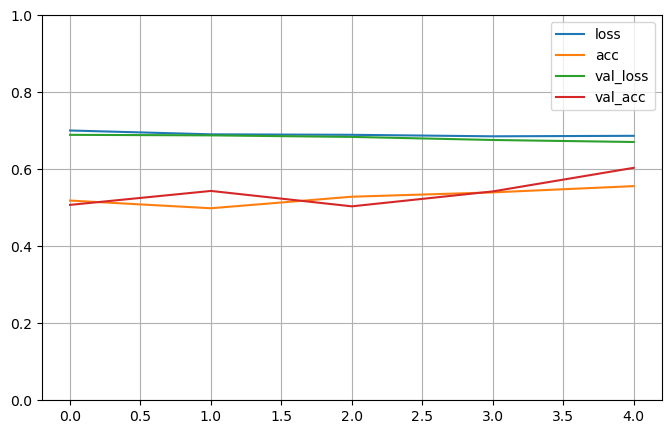

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
#Estimating the model’s performance
model.evaluate_generator(test_generator, steps=50)

C:\Users\nkale\AppData\Local\Temp\ipykernel_13088\1707716337.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=50)
